In [151]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from darts import TimeSeries
from sklearn.metrics import mean_absolute_error
from darts.models import RNNModel, TransformerModel

In [152]:
current_dir = os.getcwd()
relative_path = os.path.dirname(current_dir)
file_name = "raw_data/historical_weather_openmeteo_01011979-08122024.csv"

file_path = os.path.join(relative_path, file_name)

df_hist_openmeteo = pd.read_csv(file_path)
df_hist_openmeteo['date'] = pd.to_datetime(df_hist_openmeteo['date'])

In [153]:
#have a look at df (with relative current data)
df_hist_openmeteo.iloc[400093:400100]

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,sunshine_duration
400093,2024-08-22 13:00:00+00:00,21.599,54.913640,12.149000,21.811861,0.0,0.0,0.0,0.0,3.0,...,32.039997,17.999000,14.049000,13.299,10.849,0.388,0.404,0.378,0.403,3600.000
400094,2024-08-22 14:00:00+00:00,20.899,57.322340,12.149000,20.333294,0.0,0.0,0.0,0.0,3.0,...,34.920000,18.249000,14.349000,13.299,10.849,0.387,0.403,0.378,0.403,3600.000
400095,2024-08-22 15:00:00+00:00,19.749,61.541550,12.149000,19.177876,0.0,0.0,0.0,0.0,3.0,...,34.560000,18.149000,14.599000,13.299,10.849,0.385,0.402,0.378,0.403,3600.000
400096,2024-08-22 16:00:00+00:00,18.899,65.527435,12.299000,18.785933,0.0,0.0,0.0,0.0,2.0,...,29.519999,17.949000,14.849000,13.299,10.849,0.384,0.401,0.378,0.403,3600.000
400097,2024-08-22 17:00:00+00:00,17.999,72.581960,12.999001,18.617490,0.0,0.0,0.0,0.0,3.0,...,20.160000,17.499000,14.999001,13.349,10.849,0.384,0.400,0.378,0.403,3600.000
400098,2024-08-22 18:00:00+00:00,17.349,71.283430,12.099000,17.682388,0.0,0.0,0.0,0.0,1.0,...,9.000000,16.549000,15.099000,13.349,10.849,0.384,0.400,0.378,0.403,2452.656
400099,2024-08-22 19:00:00+00:00,15.299,80.690620,11.999001,15.710175,0.0,0.0,0.0,0.0,1.0,...,7.920000,15.249001,15.149000,13.349,10.849,0.384,0.400,0.378,0.403,0.000


In [154]:
df_hist_openmeteo.describe()

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,sunshine_duration
count,402673.000000,402673.000000,402673.000000,402673.000000,402673.000000,402673.000000,402673.000000,402072.000000,402673.000000,402673.000000,...,402673.000000,402673.000000,402673.000000,402673.000000,402673.000000,402673.000000,402673.000000,402673.000000,402673.000000,402673.000000
mean,3.233276,79.970833,-0.277857,0.783624,0.188459,0.115715,0.052561,0.423249,22.570066,1017.887973,...,26.483693,4.551766,4.537029,4.528458,4.535317,0.352727,0.353660,0.345906,0.378098,1224.395784
std,8.739597,16.496212,8.131288,10.010158,0.479505,0.411184,0.174539,0.501895,29.810829,7.951557,...,12.306928,5.627975,5.019575,4.116411,3.154845,0.038078,0.036732,0.038603,0.019291,1637.209900
min,-35.349000,7.393359,-38.449000,-40.525920,0.000000,0.000000,0.000000,0.000000,0.000000,969.300000,...,2.520000,-6.901000,-1.549000,-0.499000,0.251000,0.223000,0.250000,0.233000,0.338000,0.000000
25%,-2.899000,69.820620,-5.849000,-6.416157,0.000000,0.000000,0.000000,0.000000,1.000000,1013.300000,...,17.640000,-0.149000,0.051000,0.601000,1.501000,0.323000,0.326000,0.315000,0.364000,0.000000
50%,3.201000,84.276710,0.149000,0.514727,0.000000,0.000000,0.000000,0.140000,3.000000,1018.300000,...,24.119999,1.799000,2.251000,3.151000,4.001000,0.355000,0.356000,0.347000,0.378000,0.000000
75%,9.601000,93.078630,6.401000,8.270988,0.200000,0.000000,0.000000,0.840000,51.000000,1022.900000,...,32.039997,9.099000,9.101000,8.451000,7.501000,0.383000,0.383000,0.376000,0.391000,3600.000000
max,30.099000,100.000000,19.051000,29.438427,14.200000,14.200000,4.480000,2.130000,75.000000,1047.800000,...,120.600000,24.249000,18.451000,14.401000,11.799000,0.446000,0.439000,0.444000,0.436000,3600.000000


In [155]:
df_hist_openmeteo.shape

(402696, 32)

In [156]:
print(df_hist_openmeteo['date'].is_unique)

True


In [157]:
df_hist_openmeteo.dtypes

date                             datetime64[ns, UTC]
temperature_2m                               float64
relative_humidity_2m                         float64
dew_point_2m                                 float64
apparent_temperature                         float64
precipitation                                float64
rain                                         float64
snowfall                                     float64
snow_depth                                   float64
weather_code                                 float64
pressure_msl                                 float64
surface_pressure                             float64
cloud_cover                                  float64
cloud_cover_low                              float64
cloud_cover_mid                              float64
cloud_cover_high                             float64
et0_fao_evapotranspiration                   float64
vapour_pressure_deficit                      float64
wind_speed_10m                               f

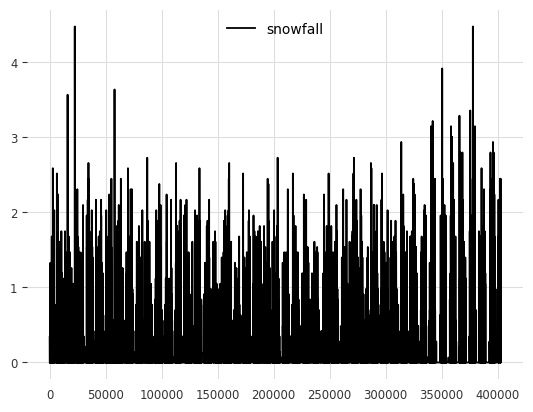

In [158]:
df_hist_openmeteo.plot(y='snowfall');

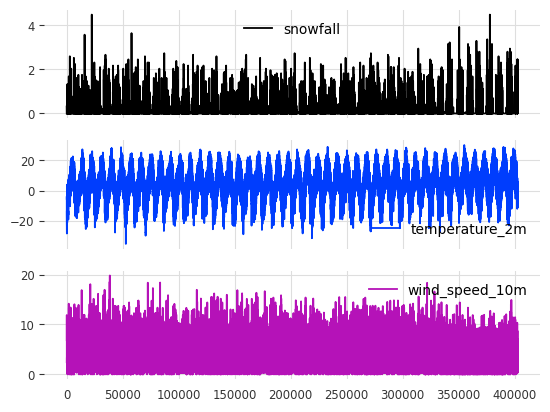

In [159]:
plot_cols = [TARGET, 'temperature_2m', 'wind_speed_10m']
plot_features = df_hist_openmeteo[plot_cols]
plot_features.index = df_hist_openmeteo.index
plot_features.plot(subplots = True);

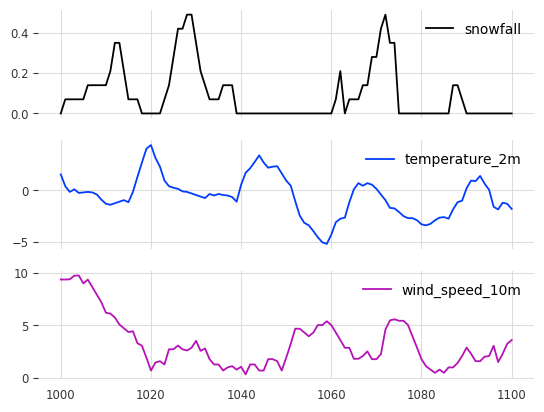

In [160]:
zoomed_slice = slice(1000,1100)

plot_features = df_hist_openmeteo.loc[zoomed_slice, plot_cols]
plot_features.plot(subplots = True);

In [161]:
TARGET = 'snowfall'

N_TARGETS = 1
N_FEATURES = 32 #???

In [162]:
df_hist_openmeteo['date'] = df_hist_openmeteo['date'].dt.tz_localize(None)
#df_hist_openmeteo.set_index(['date'], inplace=True)
df_hist_openmeteo.head(4)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,sunshine_duration
0,1979-01-01 00:00:00,-5.499,92.659720,-6.499,-9.440102,0.1,0.1,0.00,0.47,51.0,...,42.120000,-0.749,-0.649,0.301,2.201,0.316,0.315,0.304,0.367,0.0
1,1979-01-01 01:00:00,-5.349,94.816150,-6.049,-9.425217,0.2,0.1,0.07,0.47,71.0,...,46.079998,-0.749,-0.649,0.301,2.201,0.316,0.315,0.304,0.367,0.0
2,1979-01-01 02:00:00,-5.449,95.538070,-6.049,-9.401998,0.5,0.1,0.28,0.47,73.0,...,48.600000,-0.749,-0.649,0.301,2.201,0.316,0.315,0.304,0.367,0.0
3,1979-01-01 03:00:00,-5.249,94.100266,-6.049,-8.945052,0.5,0.1,0.28,0.47,73.0,...,48.239998,-0.749,-0.649,0.301,2.201,0.316,0.315,0.304,0.367,0.0


In [163]:
# target variable preparation | ensure target (=snowfall) aligns with prediction horizon  --> not necessary for RNN/ TransformerModel!
df = df_hist_openmeteo.copy()
snowfall_series_list = []
# manual, test
# df_hist_openmeteo['snowfall_1h'] = df_hist_openmeteo['snowfall'].shift(-1)
# df_hist_openmeteo[['date','snowfall','snowfall_1h']]

# for the next 48 hours:
for i in range(1,48):
    df[f'snowfall_{i}h'] = df['snowfall'].shift(-i)
    snowfall_series_list.append(TimeSeries.from_dataframe(df, 'date', value_cols=f'snowfall_{i}h'))

df.head(3)

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,snowfall_38h,snowfall_39h,snowfall_40h,snowfall_41h,snowfall_42h,snowfall_43h,snowfall_44h,snowfall_45h,snowfall_46h,snowfall_47h
0,1979-01-01 00:00:00,-5.499,92.65972,-6.499,-9.440102,0.1,0.1,0.00,0.47,51.0,...,0.07,0.07,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.07
1,1979-01-01 01:00:00,-5.349,94.81615,-6.049,-9.425217,0.2,0.1,0.07,0.47,71.0,...,0.07,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.07,0.14
2,1979-01-01 02:00:00,-5.449,95.53807,-6.049,-9.401998,0.5,0.1,0.28,0.47,73.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.07,0.14,0.14


In [164]:
len(snowfall_series_list)

47

In [165]:
y = df_hist_openmeteo[['snowfall']]
X = df_hist_openmeteo.drop(columns='snowfall')
X_columns = df_hist_openmeteo.drop(columns=['date','snowfall']).columns.tolist()

In [166]:
snowfall_series = TimeSeries.from_dataframe(df_hist_openmeteo, 'date', 'snowfall')
feature_series = TimeSeries.from_dataframe(df_hist_openmeteo, 'date', value_cols=X_columns)

In [167]:
train, temp = snowfall_series.split_after(0.7)
val, test = temp.split_after(0.5)

train_features, val_test_features = feature_series.split_after(0.7)
val_features, test_features = val_test_features.split_after(0.5)

In [168]:
model_rnn = RNNModel(
    model="LSTM",
    input_chunk_length=48,    # 48 hours input
    output_chunk_length=48,   # 48 hours output
    training_length=96,
    n_epochs=50,
    random_state=42,
)

ignoring user defined `output_chunk_length`. RNNModel uses a fixed `output_chunk_length=1`.


In [169]:
model_transformer = TransformerModel(
    input_chunk_length=48,    # 48 hours input
    output_chunk_length=48,   # 48 hours output
    n_epochs=5, # increase! just for testing
    random_state=42
)

In [170]:
# train and see if it works with smaller dataset

df_probe = df_hist_openmeteo.iloc[350000:400000]

probe_snowfall_series = TimeSeries.from_dataframe(df_probe, 'date', 'snowfall')
probe_feature_series = TimeSeries.from_dataframe(df_probe, 'date', value_cols=X_columns)

In [171]:
#train test split for df_probe

train_probe, temp_probe = probe_snowfall_series.split_after(0.7)
val_probe, test_probe = temp_probe.split_after(0.5)

train_features_probe, val_test_features_probe = probe_feature_series.split_after(0.7)
val_features_probe, test_features_probe = val_test_features_probe.split_after(0.5)

In [172]:
len(test_probe)

7500

In [173]:
model_transformer.fit(series=train_probe, past_covariates=train_features_probe, val_series=val_probe, val_past_covariates=val_features_probe)

/home/anita/.pyenv/versions/3.10.6/envs/powder_alert2.0/lib/python3.10/site-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name                | Type                | Params | Mode 
--------------------------------------------------------------------
0 | criterion           | MSELoss             | 0      | train
1 | train_criterion     | MSELoss             | 0      | train
2 | val_criterion       | MSELoss             | 0      | train
3 | train_metrics       | MetricCollection    | 0      | train
4 | val_metrics         | MetricCollection    | 0      | train
5 | encoder             | Linear              | 2.0 K  | train
6 | positional_encoding | _PositionalEncoding | 0    

Epoch 4: 100%|██████████| 1091/1091 [03:02<00:00,  5.97it/s, train_loss=0.0154, val_loss=0.0264]     

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1091/1091 [03:02<00:00,  5.97it/s, train_loss=0.0154, val_loss=0.0264]


TransformerModel(output_chunk_shift=0, d_model=64, nhead=4, num_encoder_layers=3, num_decoder_layers=3, dim_feedforward=512, dropout=0.1, activation=relu, norm_type=None, custom_encoder=None, custom_decoder=None, input_chunk_length=48, output_chunk_length=48, n_epochs=5, random_state=42)

In [197]:
snow_forecast_48h = model_transformer.predict(n=48, series=train_probe, past_covariates=probe_feature_series)
snow_forecast_48h[24]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 42.99it/s]


<TimeSeries (DataArray) (date: 1, component: 1, sample: 1)> Size: 8B
array([[[0.02148147]]])
Coordinates:
  * date       (date) datetime64[ns] 8B 2022-12-03T16:00:00
  * component  (component) object 8B 'snowfall'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [175]:
mae_transformer_model = mean_absolute_error(test_probe.values()[:48], snow_forecast_48h.values())
mae_transformer_model

0.01869869572698001

In [ ]:
# Baseline model to compare
seasonal_naive_baseline = df_probe['snowfall'].shift(365)
base_pred = seasonal_naive_baseline.dropna()

mae_seasonal_naive = mean_absolute_error(test_probe.values(), base_pred[-len(test_probe):])
mae_seasonal_naive

#alternative baseline --> mean
mean_baseline = df_probe['snowfall'].mean()
mean_baseline_pred = [mean_baseline] * len(test_probe)

mae_mean = mean_absolute_error(test_probe.values(), mean_baseline_pred)  #better

print(f"naive seasonal forecasting (shifting 465 days) gives a mae of {mae_seasonal_naive} whereas a basic mean prediction leads to a mae of {mae_mean}")

naive seasonal forecasting (shifting 465 days) gives a mae of 0.12002666588 whereas a basic mean prediction leads to a mae of 0.10770369894170177


In [195]:
print(f"Mean Absolute Error baseline prediction (mean): {mae_mean}\nvs \nMean Absolute Error initial Transformer Model (with limited data): {mae_transformer_model}\n--> Model performs much better")

Mean Absolute Error baseline prediction (mean): 0.10770369894170177
vs 
Mean Absolute Error initial Transformer Model (with limited data): 0.01869869572698001
--> Model performs much better
